In the lecture, I talked about the need for early stopping and slow training in gradient descent. If you train slowly and stop early, you can actually do quite well for estimating regression models even if $p>>n$.

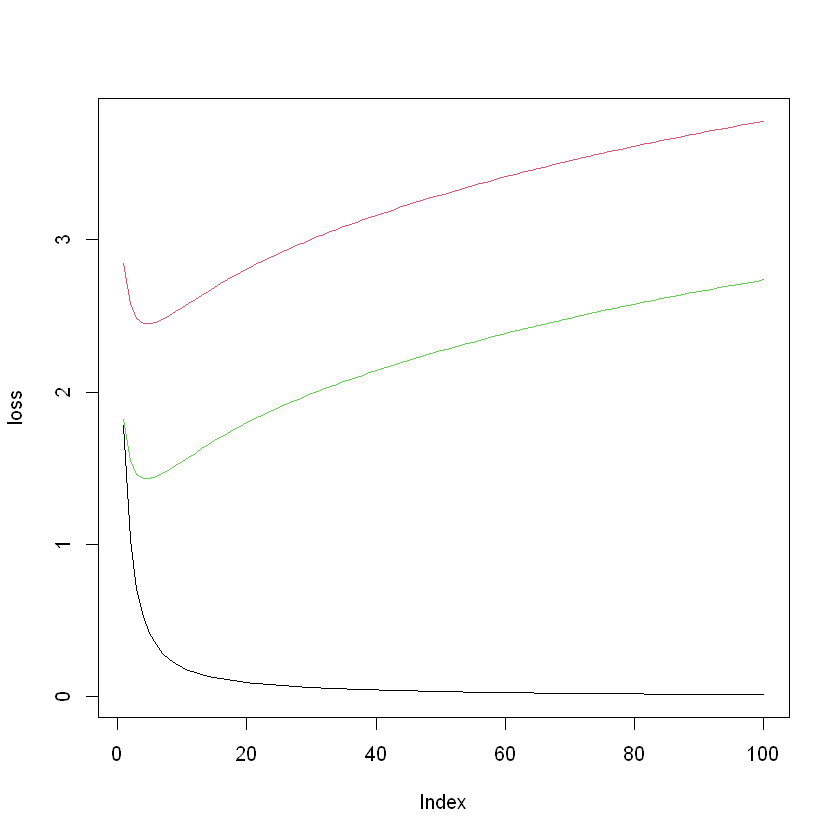

In [153]:
# Regression and gradient descent, try with different number of parameters and see how fast we overshoot 

library(MASS)

ntr<-200
nte<-2000
np<-250 # play with the number of parameters here!
X<-mvrnorm(ntr,mu=rep(0,np),Sigma=diag(rep(1,np)))
beta <- rep(0,np)
beta[1:10]<-runif(10) # true model
beta <- matrix(beta,np,1)

y <- X%*%beta+rnorm(ntr)

Xtest<-mvrnorm(nte,mu=rep(0,np),Sigma=diag(rep(1,np)))
ytest <- Xtest%*%beta+rnorm(nte)
ftest <- Xtest%*%beta

eta<-.001
T<-100
beta_est<-rep(0,np)
loss <- rep(0,T)
testloss <- rep(0,T)
oracleloss <- rep(0,T)       
for (tt in (1:T)) {
    beta_est <- beta_est + eta*t(X)%*%(y-X%*%beta_est)
    loss[tt]<-sum((y-X%*%beta_est)^2)/length(y)
    testloss[tt]<-sum((ytest-Xtest%*%beta_est)^2)/length(ytest)
    oracleloss[tt]<-sum((ftest-Xtest%*%beta_est)^2)/length(ftest)
    }

plot(loss,type="l",ylim=c(min(loss),max(testloss,oracleloss,loss)))
lines(testloss,col=2)
lines(oracleloss,col=3)

# Try with early stopping then

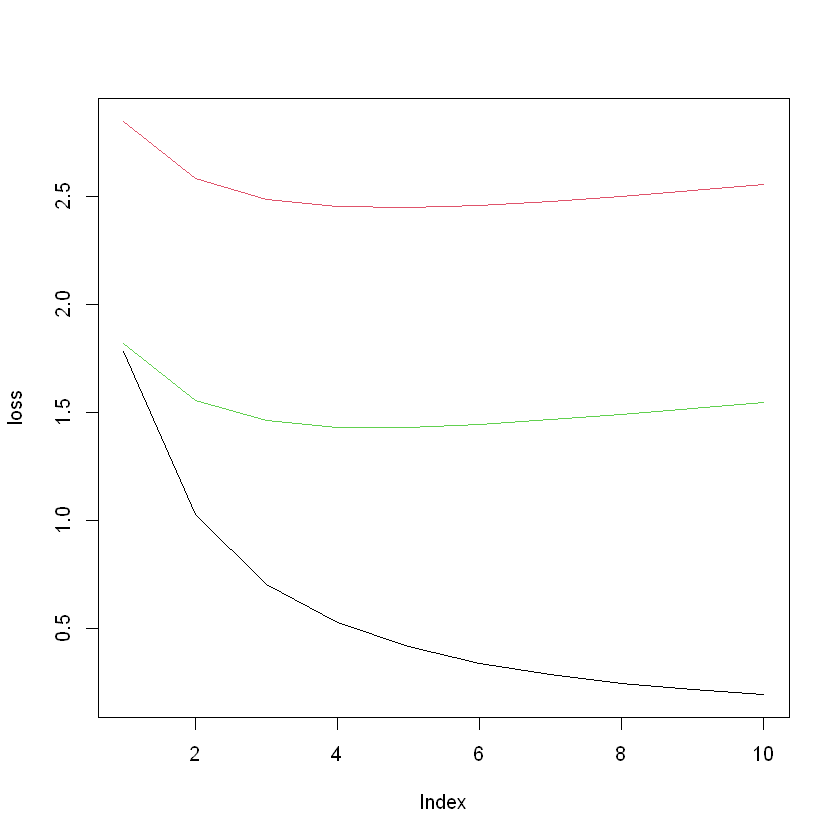

[1] 2.30977

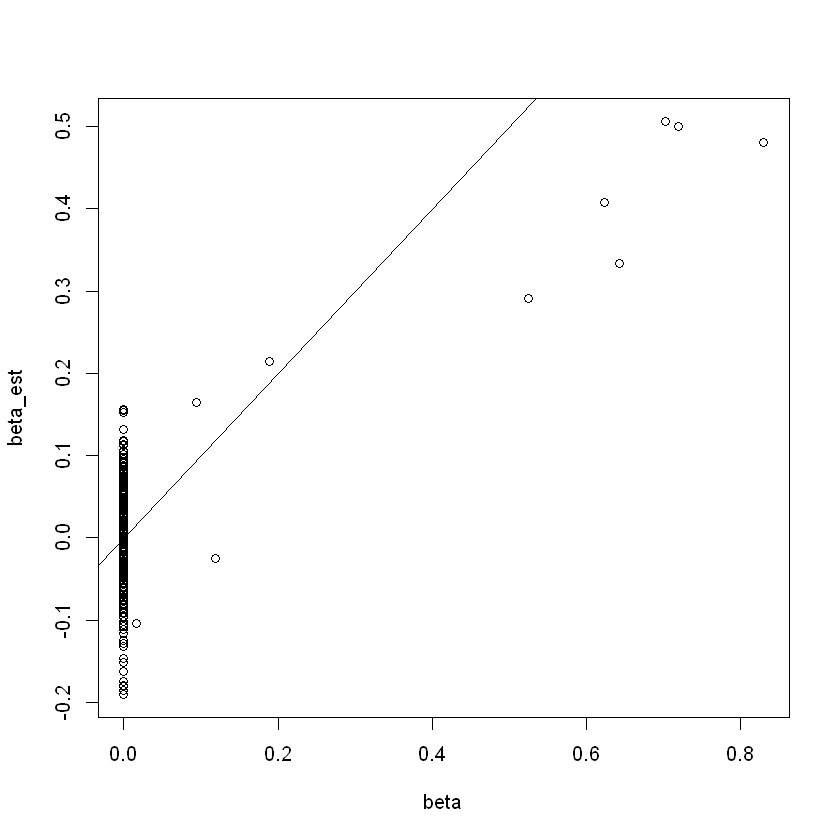

In [154]:
eta<-.001
T<-10
beta_est<-rep(0,np)
loss <- rep(0,T)
testloss <- rep(0,T)
oracleloss <- rep(0,T)       
for (tt in (1:T)) {
    beta_est <- beta_est + eta*t(X)%*%(y-X%*%beta_est)
    loss[tt]<-sum((y-X%*%beta_est)^2)/length(y)
    testloss[tt]<-sum((ytest-Xtest%*%beta_est)^2)/length(ytest)
    oracleloss[tt]<-sum((ftest-Xtest%*%beta_est)^2)/length(ftest)
    }

plot(loss,type="l",ylim=c(min(loss),max(testloss,oracleloss,loss)))
lines(testloss,col=2)
lines(oracleloss,col=3)

plot(beta, beta_est)
abline(0,1)
sum(beta_est^2)

Let's look at some boosting algorithms and simple data sets for illustration. First, I use the gbm package and then we will implement these methods from scratch as well. 

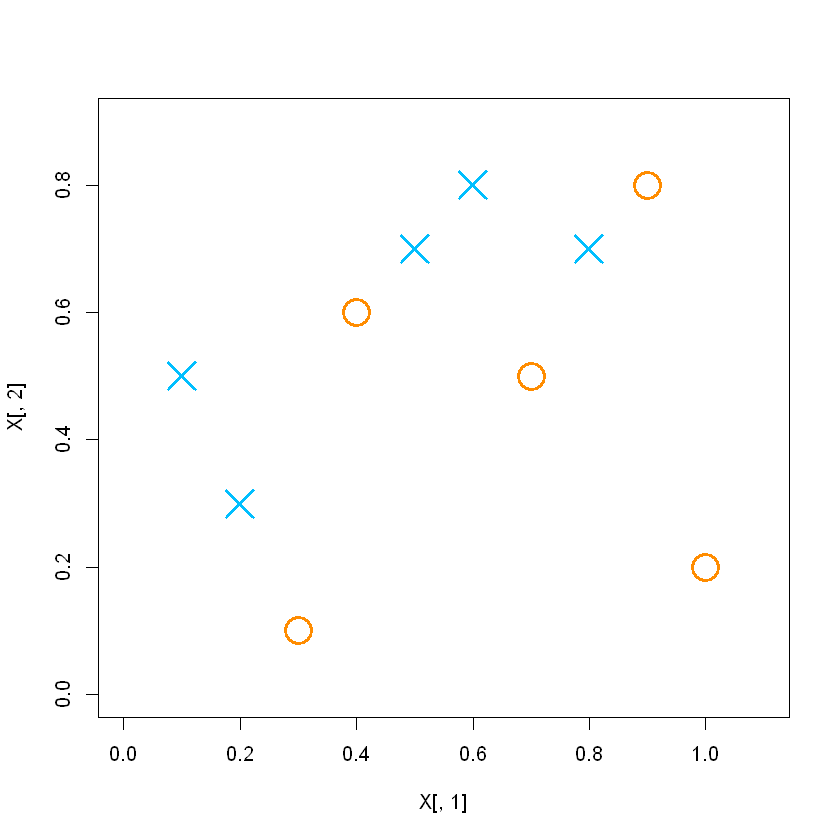

In [155]:
library(gbm)
x1 = seq(0.1, 1, 0.1)
  x2 = c(0.5, 0.3, 0.1, 0.6, 0.7,
         0.8, 0.5, 0.7, 0.8, 0.2)
  
  # the data
  y = c(1, 1, -1, -1, 1, 
        1, -1, 1, -1, -1)
  X = cbind("x1" = x1, "x2" = x2)
  xgrid = expand.grid("x1" = seq(0, 1.1, 0.01), "x2" = seq(0, 0.9, 0.01))
  
  # plot data
  plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(0, 1.1), lwd = 3,
       ylim = c(0, 0.9), cex = 3)
  
 

Using 3 trees...




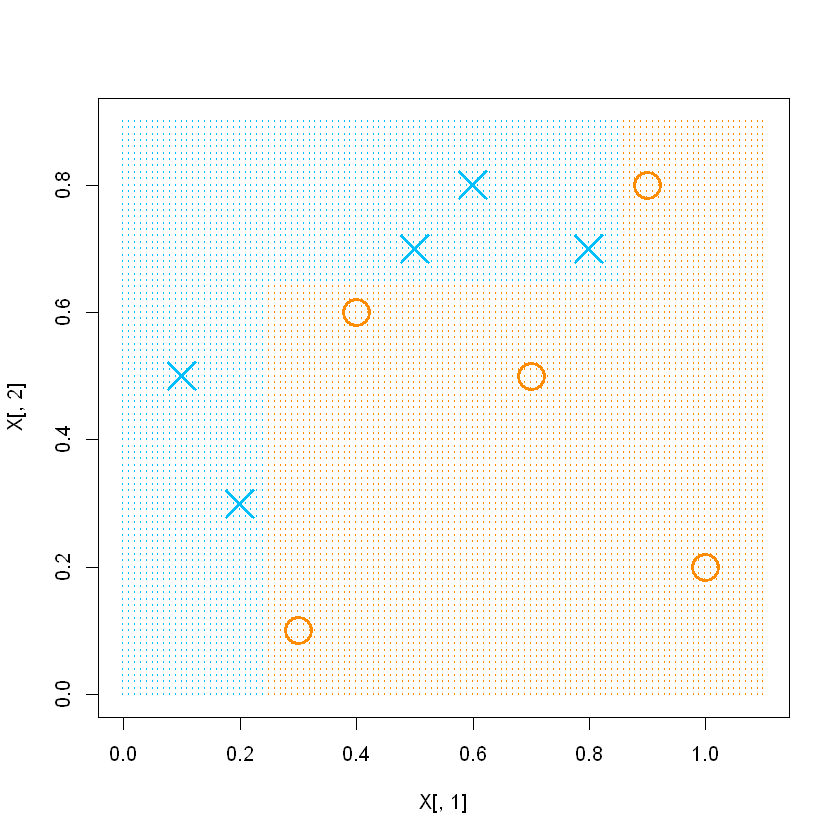

In [157]:
# fit gbm with 3 trees, try different number of trees and depths
library(gbm)
gbm.fit = gbm(y ~., data.frame(x1, x2, y= as.numeric(y == 1)), 
                distribution="adaboost", interaction.depth = 1, 
                n.minobsinnode = 1, n.trees = 3, 
                shrinkage = 1, bag.fraction = 1)

# we can view the predicted decision rule
  plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(0, 1.1), lwd = 3,
       ylim = c(0, 0.9), cex = 3)
  pred = predict(gbm.fit, xgrid)
## Using 3 trees...
  points(xgrid, col = ifelse(pred > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)

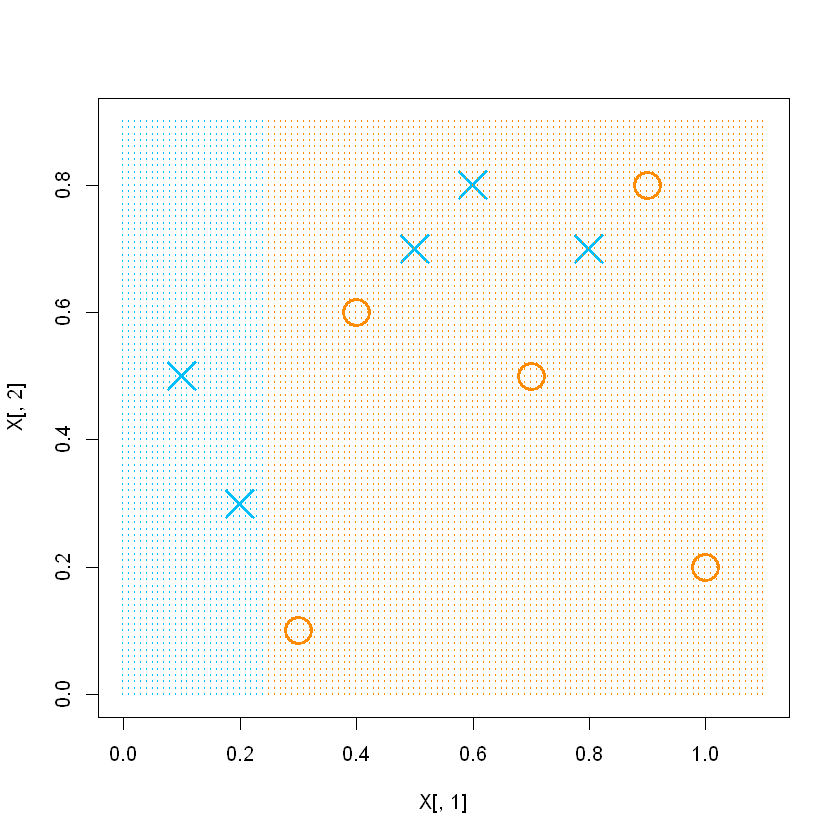

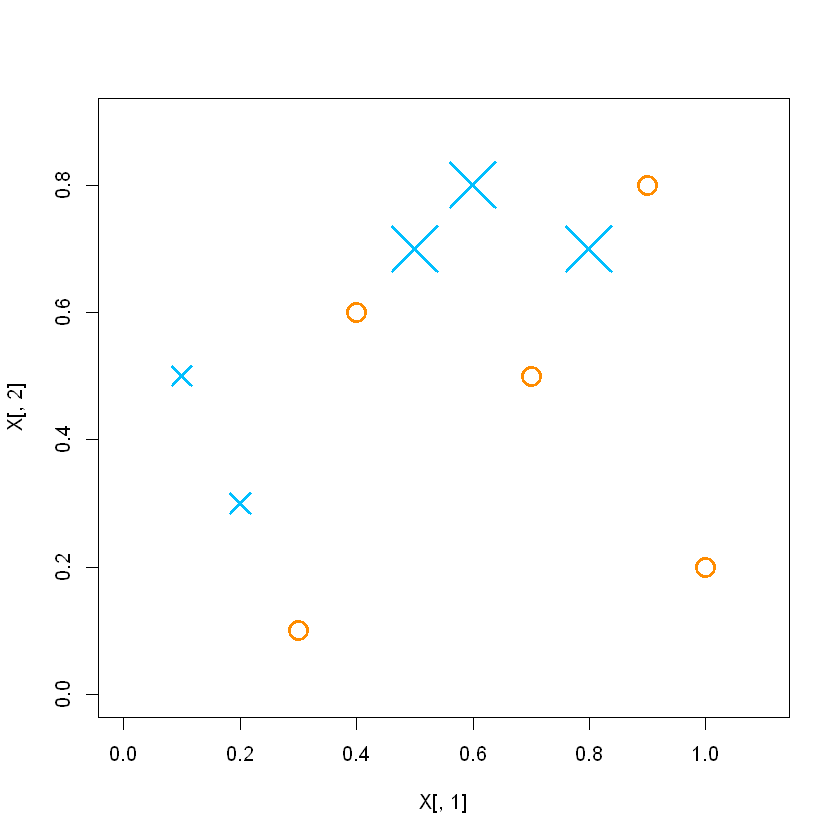

In [158]:
# First tree
  w1 = rep(1/10, 10)
  f1 <- function(x) ifelse(x[, 1] < 0.25, 1, -1)
  e1 = sum(w1*(f1(X) != y))
  a1 = 0.5*log((1-e1)/e1)
  
  w2 = w1*exp(- a1*y*f1(X))
  w2 = w2/sum(w2)
  
  # the first tree
  plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(0, 1.1), lwd = 3,
       ylim = c(0, 0.9), cex = 3)
  
  pred = f1(xgrid)
  points(xgrid, col = ifelse(pred > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)
  
  # weights after the first tree
  plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(0, 1.1), lwd = 3,
       ylim = c(0, 0.9), cex = 30*w2)

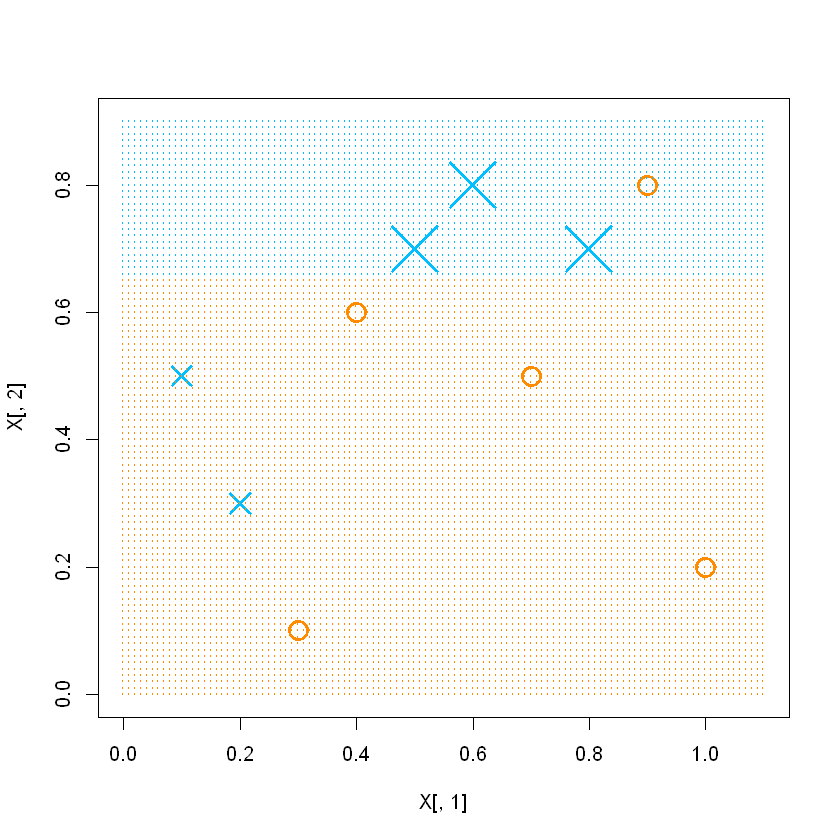

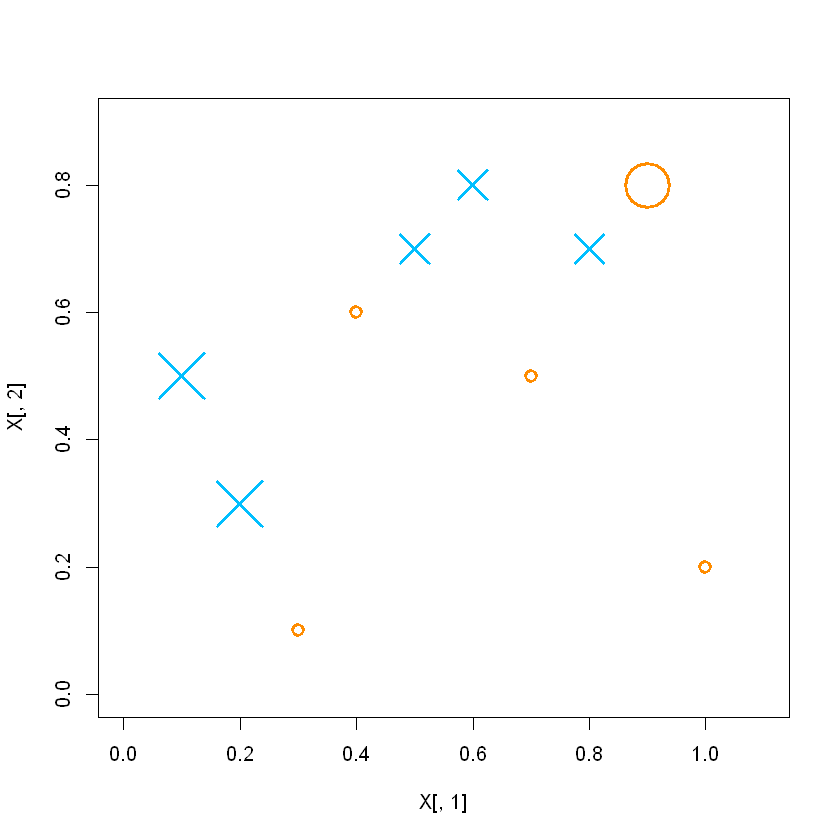

In [159]:
# Second tree
  f2 <- function(x) ifelse(x[, 2] > 0.65, 1, -1)
  e2 = sum(w2*(f2(X) != y))
  a2 = 0.5*log((1-e2)/e2)
  
  w3 = w2*exp(- a2*y*f2(X))
  w3 = w3/sum(w3)
  
  # the second tree
  plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(0, 1.1), lwd = 3,
       ylim = c(0, 0.9), cex = 30*w2)
  
  pred = f2(xgrid)
  points(xgrid, col = ifelse(pred > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)
  
  # weights after the second tree
  plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(0, 1.1), lwd = 3,
       ylim = c(0, 0.9), cex = 30*w3)

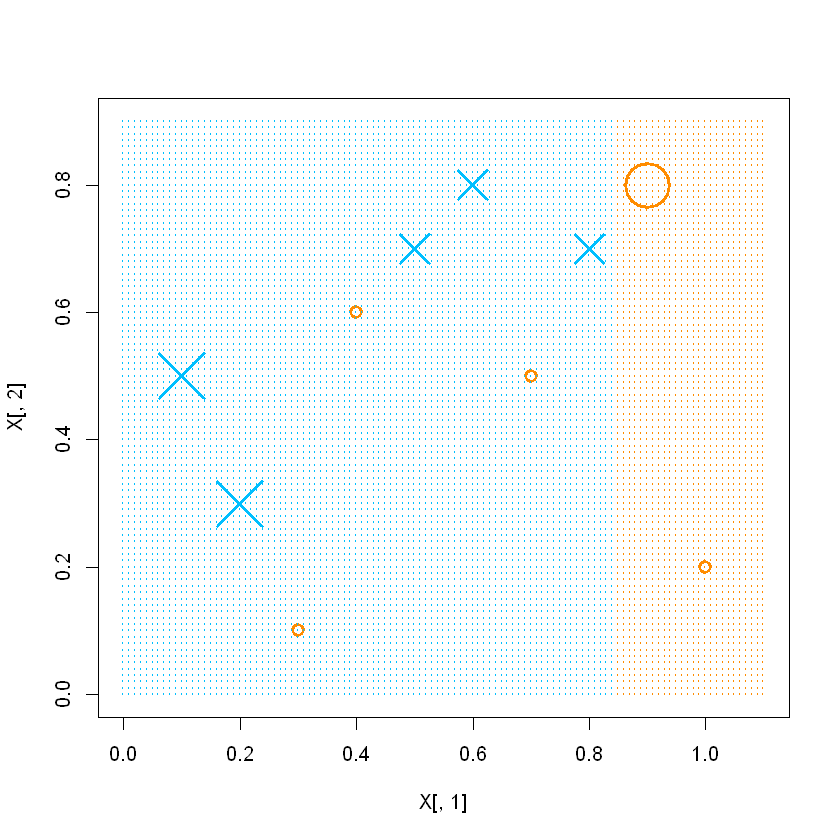

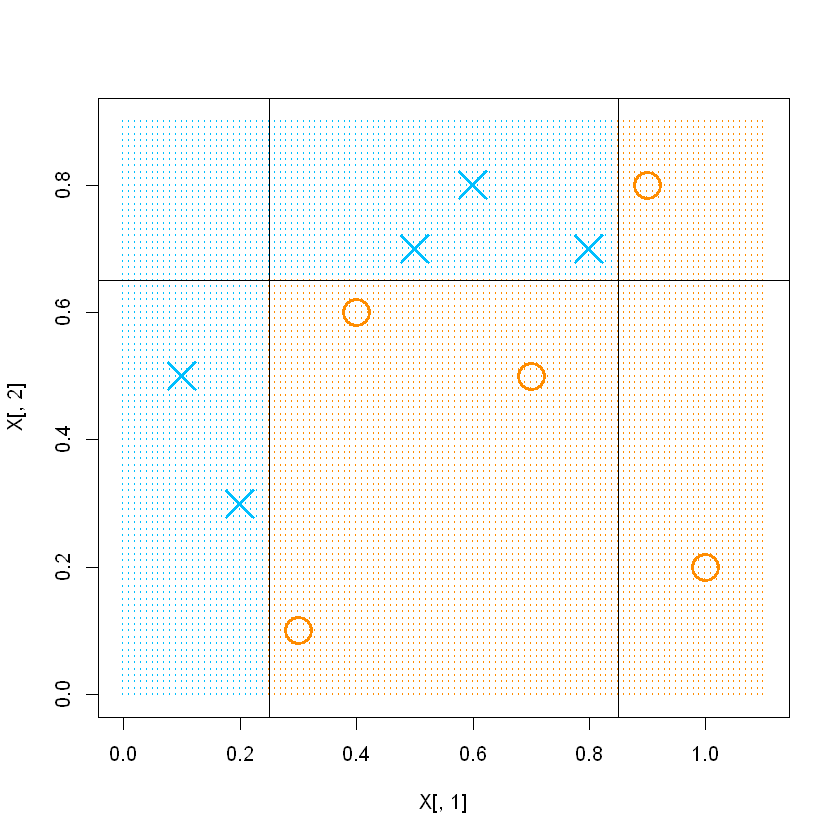

In [160]:
# Third tree
f3 <- function(x) ifelse(x[, 1] < 0.85, 1, -1)
  e3 = sum(w3*(f3(X) != y))
  a3 = 0.5*log((1-e3)/e3)
  
  # the third tree
   plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(0, 1.1), lwd = 3,
       ylim = c(0, 0.9), cex = 30*w3)
  
  pred = f3(xgrid)
  points(xgrid, col = ifelse(pred > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)
  
  # the final decision rule 
  plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(0, 1.1), lwd = 3,
       ylim = c(0, 0.9), cex = 3)
  
  pred = a1*f1(xgrid) + a2*f2(xgrid) + a3*f3(xgrid)
  points(xgrid, col = ifelse(pred > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)
  abline(v = 0.25) # f1
  abline(h = 0.65) # f2
  abline(v = 0.85) # f3


Let's try this on the slightly more challening two-circle data. Play with sample sizes and class separations at home. 

In [161]:
TwoCircleData <- function(N1,N2,r1,r2,noise) {


# Circle 1
theta1 <- runif(N1, 0, 2 * pi)
x1 <- r1 * cos(theta1) + rnorm(N1,sd=noise)
x2 <- r1 * sin(theta1) + rnorm(N1,sd=noise)
x <- cbind(x1,x2)
y <- rep(0,length(x1))


# Circle 2
theta2 <- runif(N2, 0, 2 * pi)
x1 <- r2 * cos(theta2) + rnorm(N2,sd=noise)
x2 <- r2 * sin(theta2) + rnorm(N2,sd=noise)

x <- rbind(x,cbind(x1,x2))
y <- c(y, rep(1,length(x1)))

return(list(x=x,y=y))
}

In [170]:
MM <- TwoCircleData(1500,1500,0,3,1)
MM$y[MM$y==0]<-(-1)

ntr<-200
ii <- sample(seq(1,3000),ntr)


y <- MM$y[ii]
yt <- MM$y[-ii]
x <- MM$x[ii,]
xt <- MM$x[-ii,]

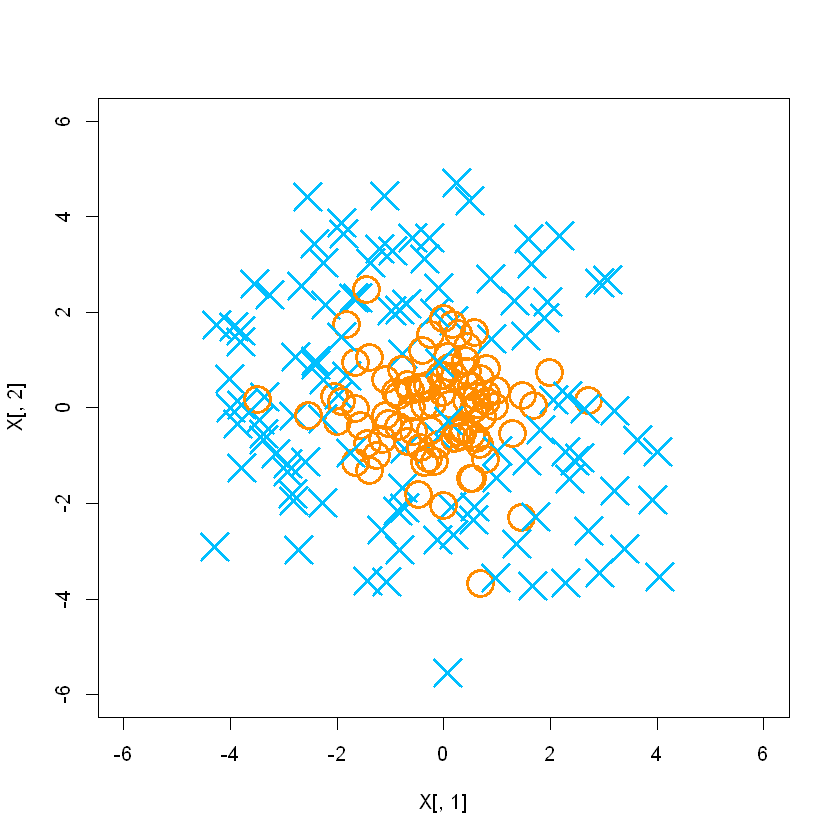

In [171]:
X = cbind("x1" = x[,1], "x2" = x[,2])
xgrid = expand.grid("x1" = seq(-6, 6, 0.1), "x2" = seq(-6, 6, 0.1))
  
# plot data
plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(-6, 6), lwd = 3,
       ylim = c(-6, 6), cex = 3)



Using 50 trees...




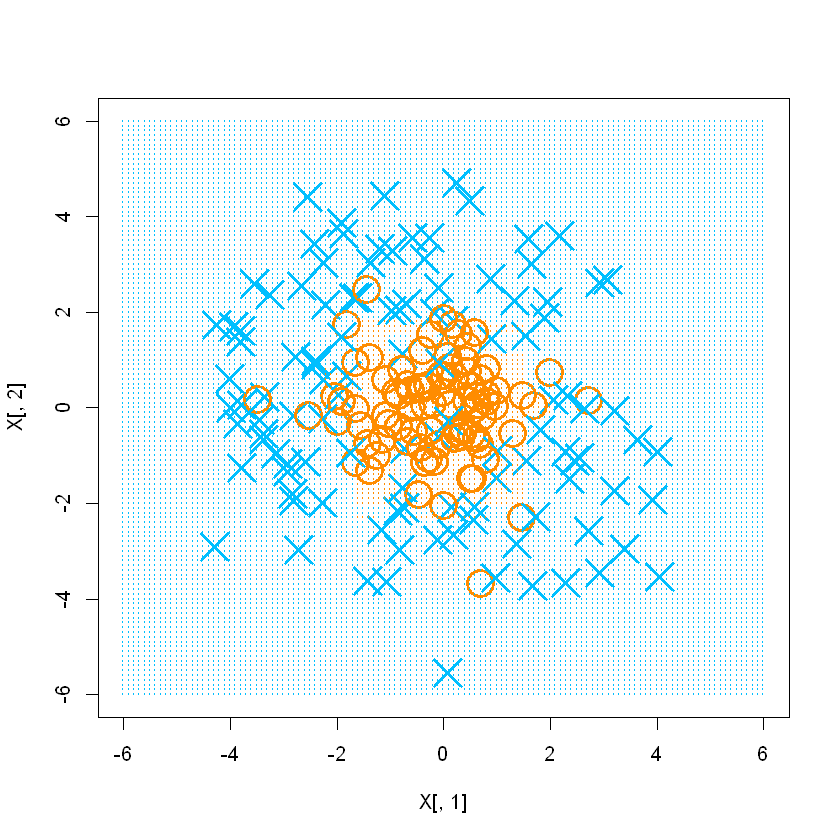

In [182]:
# fit gbm with 10 trees, try different ones

  gbm.fit = gbm(y ~., data.frame(x1=x[,1], x2=x[,2], y= as.numeric(y == 1)), 
                distribution="bernoulli", interaction.depth = 1, 
                n.minobsinnode = 5, n.trees = 50, 
                shrinkage = 1, bag.fraction = 1)
  
# shrinkage controls the update size and n.minobsinnode is a way to regulate the splits that you can make - a bigger value constrains the model

#
  plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(-6, 6), lwd = 3,
       ylim = c(-6, 6), cex = 3)
  pred = predict(gbm.fit, xgrid)
## Using 50 trees...
  points(xgrid, col = ifelse(pred > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)

Let's see how the decision boundaries evolve as you increase the number of trees. 

    pp
yt     -1    1
  -1 1374   38
  1  1013  375

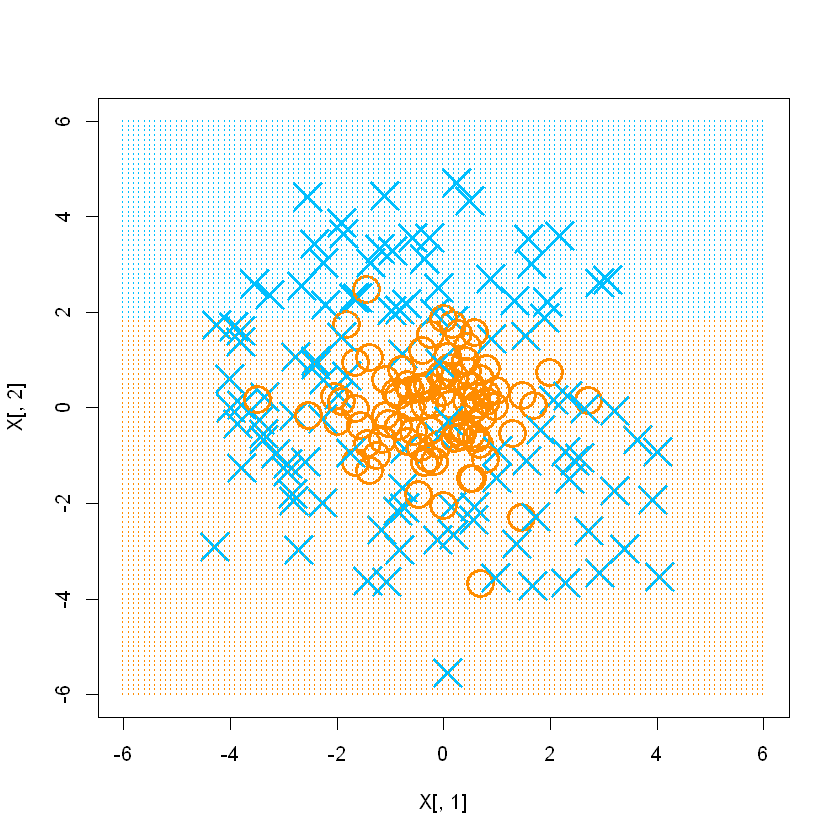

    pp
yt     -1    1
  -1 1360   52
  1   758  630

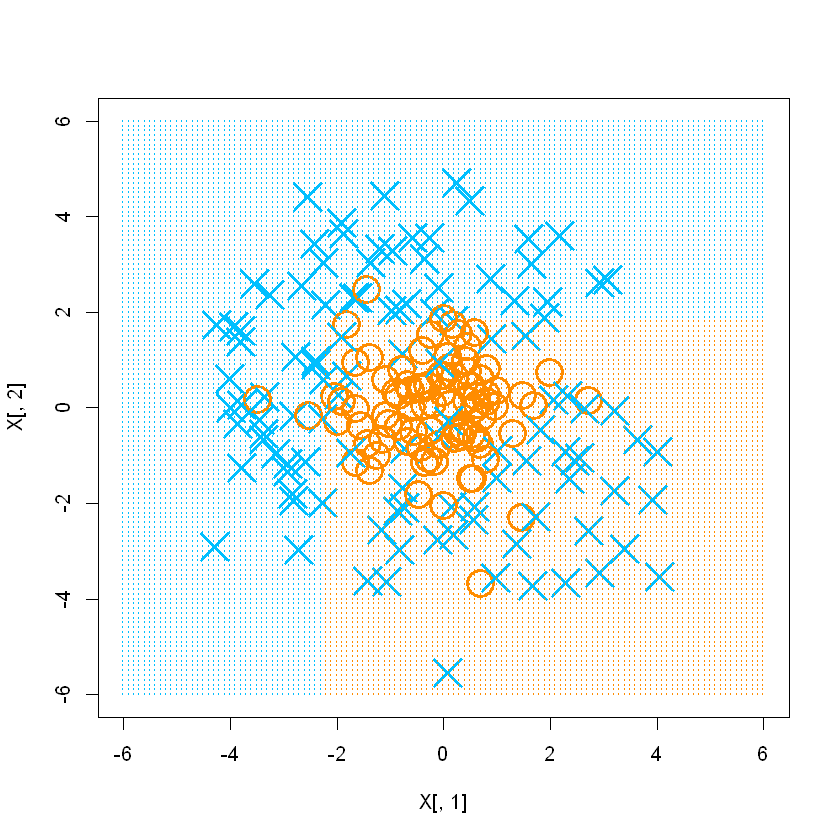

    pp
yt     -1    1
  -1 1272  140
  1   190 1198

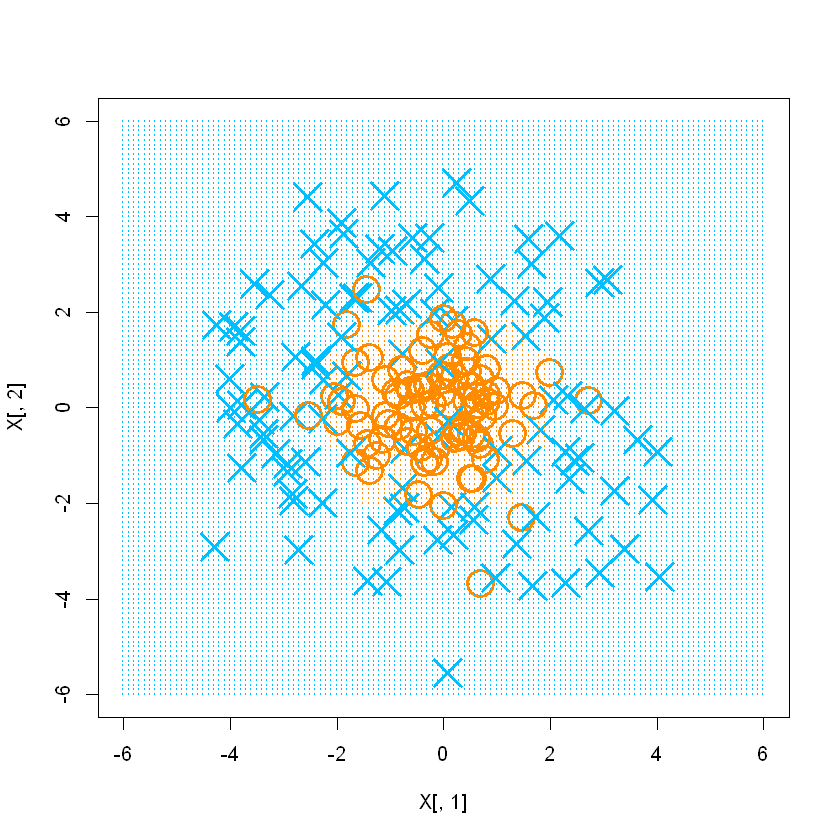

    pp
yt     -1    1
  -1 1241  171
  1   164 1224

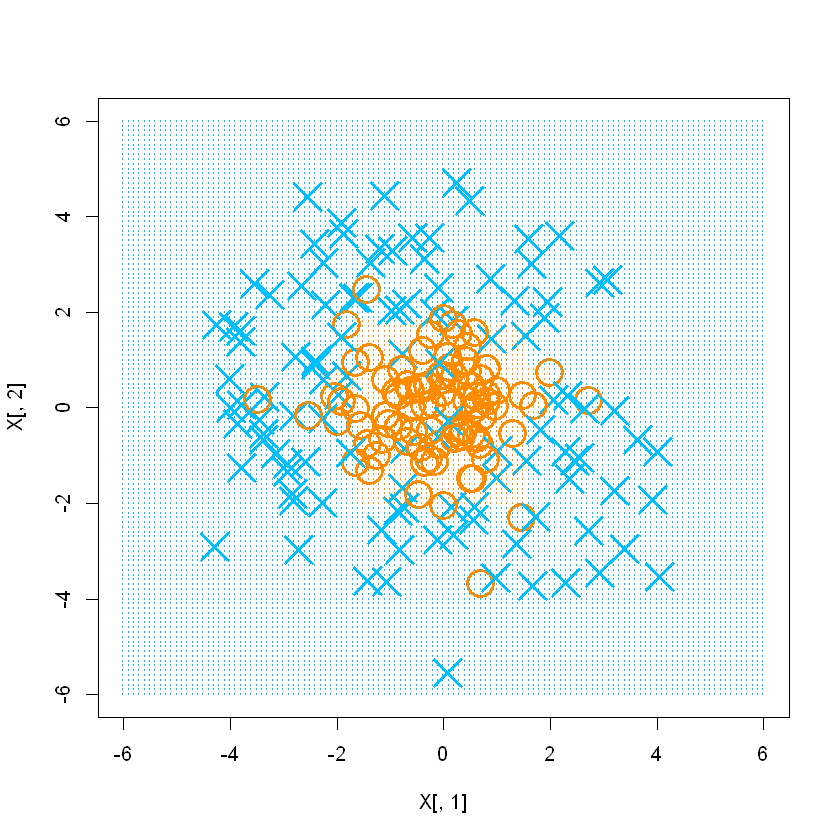

    pp
yt     -1    1
  -1 1191  221
  1   150 1238

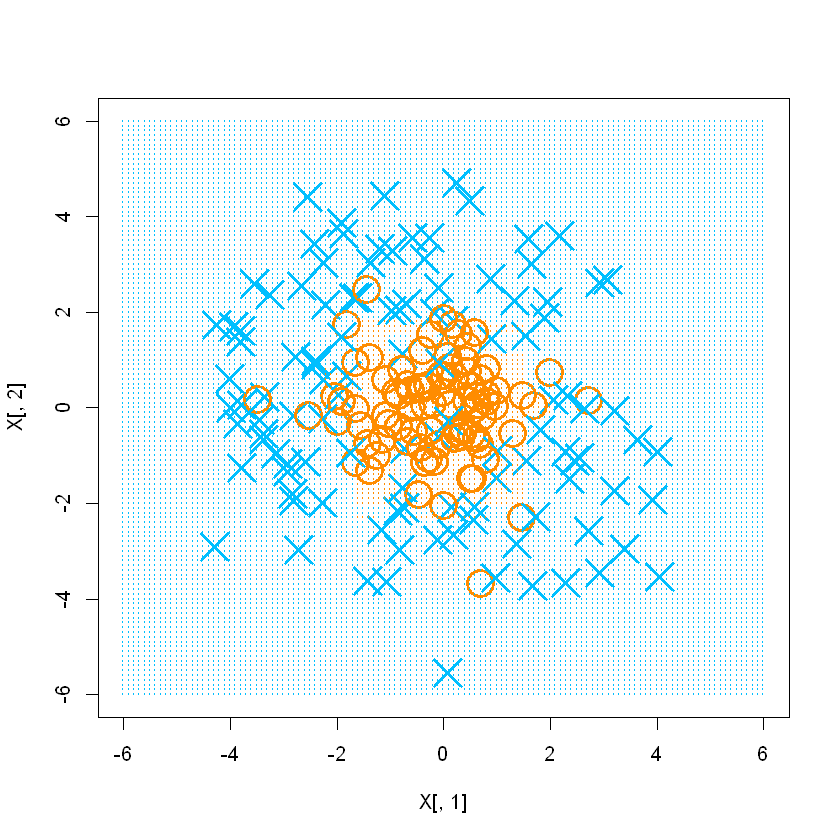

In [183]:
 # we can view the predicted decision rule
  plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(-6, 6), lwd = 3,
       ylim = c(-6, 6), cex = 3)
  pred = predict(gbm.fit, xgrid,n.trees=1)
## Using 3 trees...
  points(xgrid, col = ifelse(pred > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)
 pp<-sign(predict(gbm.fit,data.frame(x1=xt[,1], x2=xt[,2], y= as.numeric(yt == 1)),n.trees=1))
table(yt,pp)


plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(-6, 6), lwd = 3,
       ylim = c(-6, 6), cex = 3)
  pred = predict(gbm.fit, xgrid,n.trees=2)
## Using 3 trees...
  points(xgrid, col = ifelse(pred > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)
pp<-sign(predict(gbm.fit,data.frame(x1=xt[,1], x2=xt[,2], y= as.numeric(yt == 1)),n.trees=2))
table(yt,pp)

plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(-6, 6), lwd = 3,
       ylim = c(-6, 6), cex = 3)
  pred = predict(gbm.fit, xgrid,n.trees=10)
## Using 3 trees...
  points(xgrid, col = ifelse(pred > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)
pp<-sign(predict(gbm.fit,data.frame(x1=xt[,1], x2=xt[,2], y= as.numeric(yt == 1)),n.trees=10))
table(yt,pp)

plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(-6, 6), lwd = 3,
       ylim = c(-6, 6), cex = 3)
  pred = predict(gbm.fit, xgrid,n.trees=25)
## Using 3 trees...
  points(xgrid, col = ifelse(pred > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)
pp<-sign(predict(gbm.fit,data.frame(x1=xt[,1], x2=xt[,2], y= as.numeric(yt == 1)),n.trees=25))
table(yt,pp)

plot(X[, 1], X[, 2], col = ifelse(y > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(-6, 6), lwd = 3,
       ylim = c(-6, 6), cex = 3)
  pred = predict(gbm.fit, xgrid,n.trees=50)
## Using 3 trees...
  points(xgrid, col = ifelse(pred > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)
pp<-sign(predict(gbm.fit,data.frame(x1=xt[,1], x2=xt[,2], y= as.numeric(yt == 1)),n.trees=50))
table(yt,pp)

GBM is actually quite a simple algorithm to implement from scratch. Here, I implement it to accept 0-1 data instead of -1/+1.

[1] "Accuracy: 0.852857142857143"


   yt
       0    1
  0 1276  282
  1  130 1112

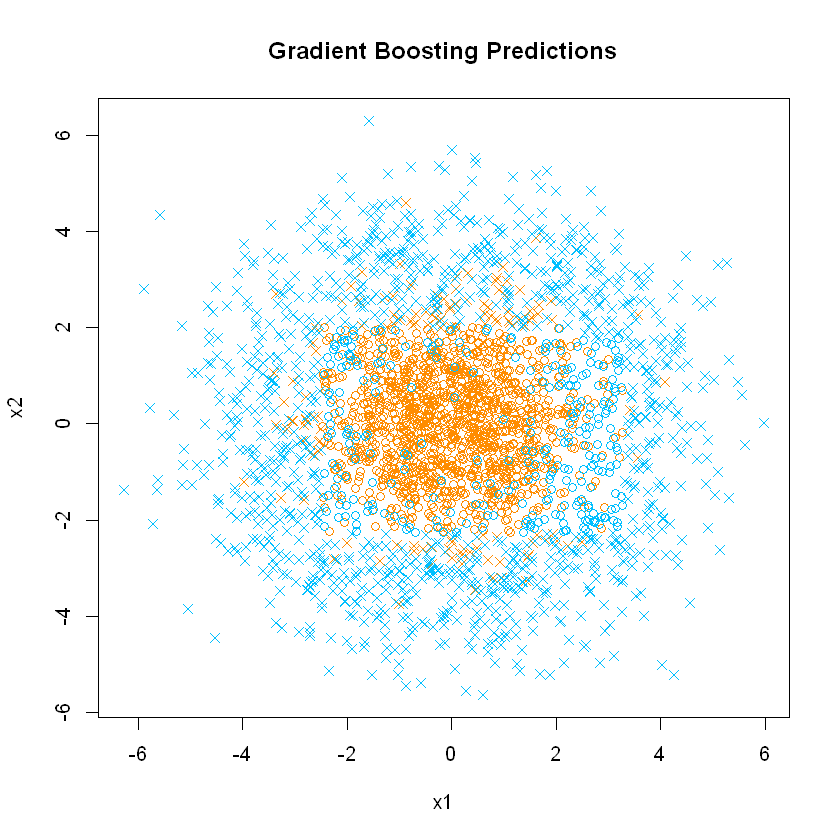

In [189]:
MM <- TwoCircleData(1500,1500,1,3.5,1)

ntr<-200
ii <- sample(seq(1,3000),ntr)

y <- MM$y[ii]
yt <- MM$y[-ii]
x <- MM$x[ii,]
xt <- MM$x[-ii,]


# collect the data as data frames:
data <- data.frame(x1=x[,1],x2=x[,2])
data_t <- data.frame(x1=xt[,1],x2=xt[,2])

# Function to fit and predict from a decision tree, here you can directly manipulate r.part through the control including split decisions
fit_predict <- function(data, data2, target) {
  fit <- rpart(target ~ x1+x2, data = data, control = rpart.control(maxdepth = tree_depth, minsplit=10))
  return(list(p_train=predict(fit, newdata = data), p_test=predict(fit, newdata = data2)))
}

gbmfromscratch <-function(x,y,xnew,n_trees, learning_rate, tree_depth) {
#
# Initialize the model with a guess for log odds based on marginals
 initial_guess <- log(sum(y == 1) / sum(y == 0))
 f0 <- rep(initial_guess, n)
 f0_test <- rep(initial_guess, nrow(xnew))
# Gradient Boosting Algorithm
for (i in 1:n_trees) {
  # Compute pseudo-residuals
  p <- exp(f0) / (1 + exp(f0)) #sigmoid applied to linear predictor
  p_test <- exp(f0_test) / (1 + exp(f0_test))
  residuals <- y - p # simple form since the derivative of the sigmoid cancels out
  # Fit a tree to the residuals
  preds <- fit_predict(data, data_t, residuals)
  tree_predictions <- preds$p_train
  test_predictions <- preds$p_test
  # Update the model with the tree predictions
  f0 <- f0 + learning_rate * tree_predictions
  f0_test <- f0_test + learning_rate * test_predictions
 }
# Final predictions
final_probabilities <- exp(f0) / (1 + exp(f0))
final_predictions <- ifelse(final_probabilities > 0.5, 1, 0)
test_probabilities <- exp(f0_test) / (1 + exp(f0_test))
test_predictions <- ifelse(test_probabilities > 0.5, 1, 0)  
return(list(p_train=final_predictions, p_test=test_predictions))
}
######

# Apply to the 2-circle data 
gg<-gbmfromscratch(x,y,xt,10,1,1) # try different number of trees, depths and learning rates

# Evaluate the model
accuracy <- sum(gg$p_test == yt) / length(yt)
print(paste("Accuracy:", accuracy))

# Plot the final predictions against the actual data


plot(xt, col = ifelse(yt > 0, "deepskyblue", "darkorange"),
     pch = ifelse(gg$p_test > 0, 4, 1), main = "Gradient Boosting Predictions")
table(gg$p_test,yt)


For the sake of comparison, here is the same problem but we use randomForests instead. 

In [190]:
library(randomForest)
library(ggplot2)

# Generate two-circle data
MM <- TwoCircleData(1500,1500,1,3.5,1)
MM$y[MM$y==0]<-(-1)

ntr<-200
ii <- sample(seq(1,3000),ntr)


y <- MM$y[ii]
yt <- MM$y[-ii]
x <- MM$x[ii,]
xt <- MM$x[-ii,]

data <- data.frame(x1=x[,1], x2=x[,2], label = as.factor(y))
names(data)

# Train Random Forest Classifier
forest_model <- randomForest(label ~ x1+x2, data = data, ntree = 100)

# Generate grid for prediction
x1_range <- seq(from = min(data$x1) - 0.1, to = max(data$x1) + 0.1, by = 0.05)
x2_range <- seq(from = min(data$x2) - 0.1, to = max(data$x2) + 0.1, by = 0.05)
grid <- expand.grid(x1 = x1_range, x2 = x2_range)
grid$label <- predict(forest_model, newdata = grid)

p_test <- predict(forest_model, newdata = data.frame(x1=xt[,1],x2=xt[,2]))
table(yyt,p_test)


[1] "x1"    "x2"    "label"

   p_test
yyt   -1    1
  0 1234  164
  1  231 1171

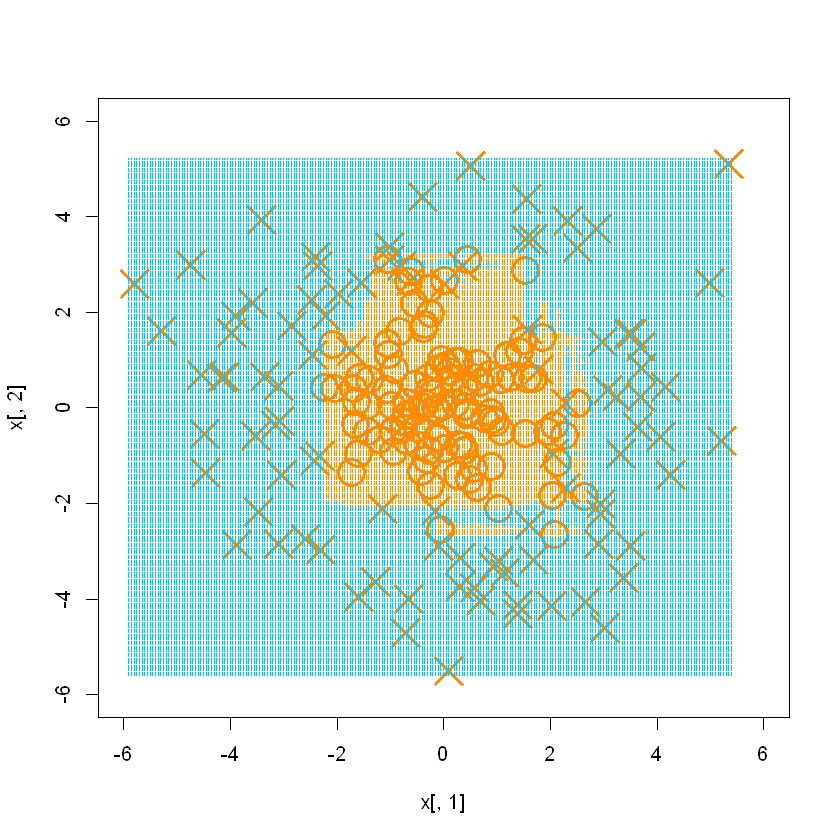

In [191]:
plot(x[, 1], x[, 2], col = ifelse(yyt > 0, "deepskyblue", "darkorange"),
       pch = ifelse(y > 0, 4, 1), xlim = c(-6, 6), lwd = 3,
       ylim = c(-6, 6), cex = 3)

## Using 3 trees...
  points(grid, col = ifelse(as.numeric(grid$label)-1 > 0, "deepskyblue", "darkorange"), 
         cex = 0.2)